In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Adjust the file path based on your upload location
file_path = "/content/Sales_Transactions_Dataset_Weekly.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

  Product_Code  W0  W1  W2  W3  W4  W5  W6  W7  W8  ...  Normalized 42  \
0           P1  11  12  10   8  13  12  14  21   6  ...           0.06   
1           P2   7   6   3   2   7   1   6   3   3  ...           0.20   
2           P3   7  11   8   9  10   8   7  13  12  ...           0.27   
3           P4  12   8  13   5   9   6   9  13  13  ...           0.41   
4           P5   8   5  13  11   6   7   9  14   9  ...           0.27   

   Normalized 43  Normalized 44  Normalized 45  Normalized 46  Normalized 47  \
0           0.22           0.28           0.39           0.50           0.00   
1           0.40           0.50           0.10           0.10           0.40   
2           1.00           0.18           0.18           0.36           0.45   
3           0.47           0.06           0.12           0.24           0.35   
4           0.53           0.27           0.60           0.20           0.20   

   Normalized 48  Normalized 49  Normalized 50  Normalized 51  
0         

In [105]:
print(data.describe())

               W0          W1          W2          W3          W4          W5  \
count  811.000000  811.000000  811.000000  811.000000  811.000000  811.000000   
mean     8.902589    9.129470    9.389642    9.717633    9.574599    9.466091   
std     12.067163   12.564766   13.045073   13.553294   13.095765   12.823195   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      3.000000    3.000000    3.000000    4.000000    4.000000    3.000000   
75%     12.000000   12.000000   12.000000   13.000000   13.000000   12.500000   
max     54.000000   53.000000   56.000000   59.000000   61.000000   52.000000   

               W6          W7          W8          W9  ...  Normalized 42  \
count  811.000000  811.000000  811.000000  811.000000  ...     811.000000   
mean     9.720099    9.585697    9.784217    9.681874  ...       0.299149   
std     13.347375   13.049138   13.5502

In [106]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load your CSV file
file_path = '/content/Sales_Transactions_Dataset_Weekly.csv'
your_data = pd.read_csv(file_path)

# Display information about your data
print(your_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Columns: 107 entries, Product_Code to Normalized 51
dtypes: float64(52), int64(54), object(1)
memory usage: 678.1+ KB
None


In [107]:
# Assuming 'data' is your DataFrame
columns_list = data.columns.tolist()

# Display the column names
print(columns_list)


['Product_Code', 'W0', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9', 'W10', 'W11', 'W12', 'W13', 'W14', 'W15', 'W16', 'W17', 'W18', 'W19', 'W20', 'W21', 'W22', 'W23', 'W24', 'W25', 'W26', 'W27', 'W28', 'W29', 'W30', 'W31', 'W32', 'W33', 'W34', 'W35', 'W36', 'W37', 'W38', 'W39', 'W40', 'W41', 'W42', 'W43', 'W44', 'W45', 'W46', 'W47', 'W48', 'W49', 'W50', 'W51', 'MIN', 'MAX', 'Normalized 0', 'Normalized 1', 'Normalized 2', 'Normalized 3', 'Normalized 4', 'Normalized 5', 'Normalized 6', 'Normalized 7', 'Normalized 8', 'Normalized 9', 'Normalized 10', 'Normalized 11', 'Normalized 12', 'Normalized 13', 'Normalized 14', 'Normalized 15', 'Normalized 16', 'Normalized 17', 'Normalized 18', 'Normalized 19', 'Normalized 20', 'Normalized 21', 'Normalized 22', 'Normalized 23', 'Normalized 24', 'Normalized 25', 'Normalized 26', 'Normalized 27', 'Normalized 28', 'Normalized 29', 'Normalized 30', 'Normalized 31', 'Normalized 32', 'Normalized 33', 'Normalized 34', 'Normalized 35', 'Normalized 3

In [108]:
# selecting the columns
columns_to_keep = ['W1', 'W25', 'W50' ,'MAX']
home_data = data[columns_to_keep]

# Displaying DataFrame
print(home_data.head())


   W1  W25  W50  MAX
0  12    9    5   21
1   6    3    6   10
2  11    8    8   14
3   8    6    7   19
4   5   12    8   18


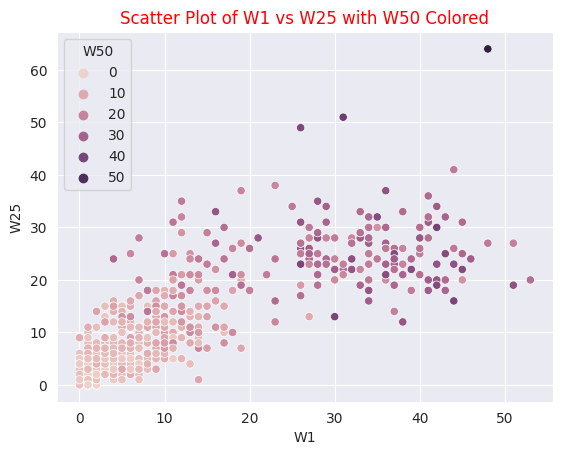

In [109]:

sns.scatterplot(data=data, x='W1', y='W25', hue='W50')
plt.title('Scatter Plot of W1 vs W25 with W50 Colored', color='red')
plt.show()


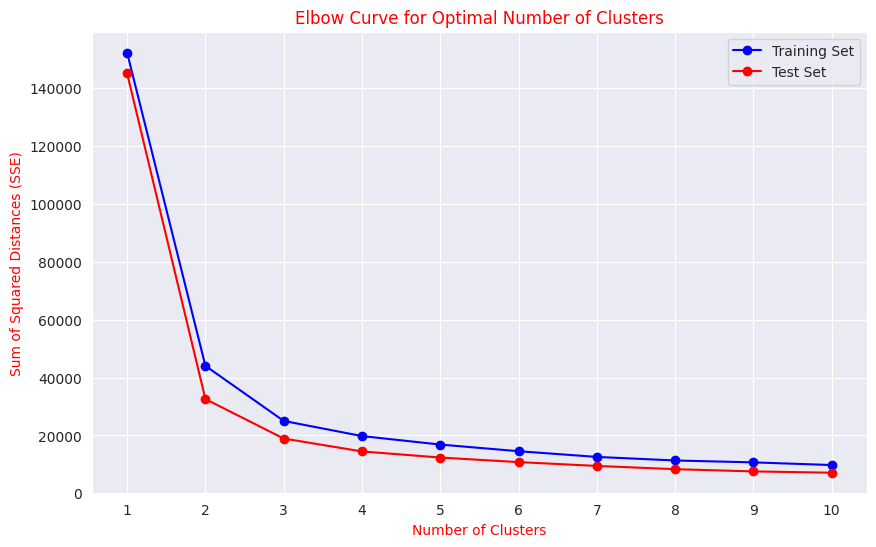

In [110]:

#'data' is our DataFrame
X_train, X_test, y_train, y_test = train_test_split(data[['W1', 'W25', 'W50']],
                                                    data[['MAX']],
                                                    test_size=0.45, random_state=101)

# Number of clusters
num_clusters = np.arange(1, 11)
inertia_values_train = []
inertia_values_test = []

# Loop in different cluster
for k in num_clusters:
    kmeans_train = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans_train.fit(X_train)
    inertia_values_train.append(kmeans_train.inertia_)

    kmeans_test = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans_test.fit(X_test)
    inertia_values_test.append(kmeans_test.inertia_)

# Plotting the Elbow Curve training and test data
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, inertia_values_train, marker='o', linestyle='-', color='blue', label='Training Set')
plt.plot(num_clusters, inertia_values_test, marker='o', linestyle='-', color='red', label='Test Set')
plt.title('Elbow Curve for Optimal Number of Clusters', color='red')
plt.xlabel('Number of Clusters', color='red')
plt.ylabel('Sum of Squared Distances (SSE)', color='red')
plt.xticks(num_clusters)
plt.legend()
plt.grid(True)
plt.show()


In [111]:
# Normalising the data

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

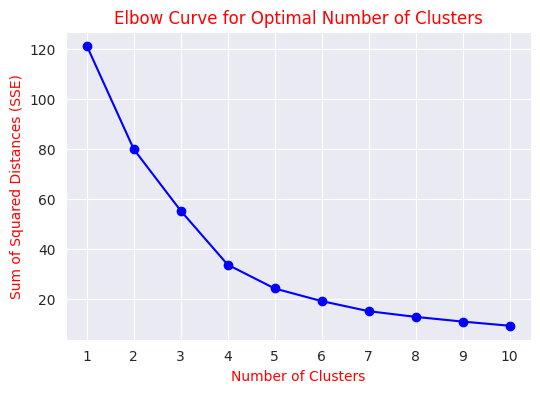

In [112]:
from sklearn.cluster import KMeans

# Number of clusters to consider
num_clusters = np.arange(1, 11)
inertia_values = []

# Loop through different cluster numbers
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_train_norm)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(6, 4))
plt.plot(num_clusters, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for Optimal Number of Clusters', color='red')
plt.xlabel('Number of Clusters', color='red')
plt.ylabel('Sum of Squared Distances (SSE)', color='red')
plt.xticks(num_clusters)
plt.grid(True)
plt.show()


In [113]:
# Fit the model with k=3
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(X_train_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

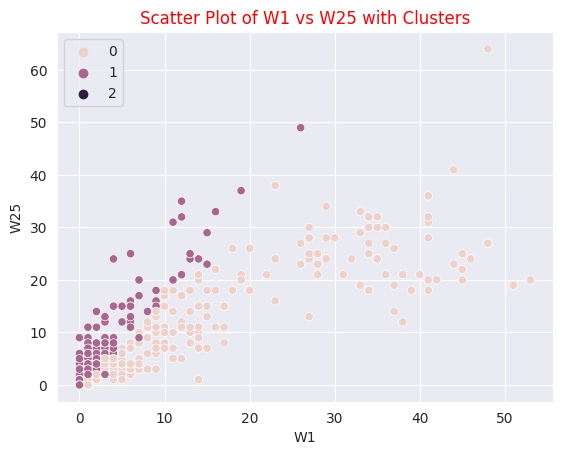

In [114]:
sns.scatterplot(data = X_train, x = 'W1', y = 'W25', hue = kmeans.labels_)
plt.title('Scatter Plot of W1 vs W25 with Clusters',color = 'red')
plt.show()

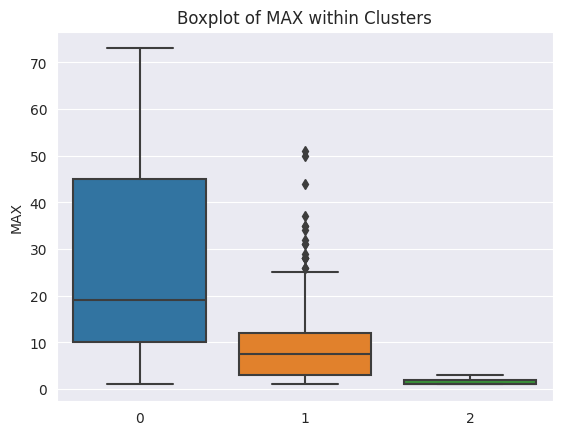

In [115]:
sns.boxplot(x = kmeans.labels_, y = y_train['MAX'])
plt.title('Boxplot of MAX within Clusters')
plt.show()

In [116]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.4205088935765612

In [80]:
file_path = "/content/dow_jones.csv"
data1 = pd.read_csv(file_path)

# for the first few rows of the dataset
print(data.head())

  Product_Code  W0  W1  W2  W3  W4  W5  W6  W7  W8  ...  Normalized 42  \
0           P1  11  12  10   8  13  12  14  21   6  ...           0.06   
1           P2   7   6   3   2   7   1   6   3   3  ...           0.20   
2           P3   7  11   8   9  10   8   7  13  12  ...           0.27   
3           P4  12   8  13   5   9   6   9  13  13  ...           0.41   
4           P5   8   5  13  11   6   7   9  14   9  ...           0.27   

   Normalized 43  Normalized 44  Normalized 45  Normalized 46  Normalized 47  \
0           0.22           0.28           0.39           0.50           0.00   
1           0.40           0.50           0.10           0.10           0.40   
2           1.00           0.18           0.18           0.36           0.45   
3           0.47           0.06           0.12           0.24           0.35   
4           0.53           0.27           0.60           0.20           0.20   

   Normalized 48  Normalized 49  Normalized 50  Normalized 51  
0         

In [81]:
print(data1.describe())

          quarter        open        high         low       close  \
count  750.000000  750.000000  750.000000  750.000000  750.000000   
mean     1.520000   53.651840   54.669987   52.640160   53.729267   
std      0.499933   32.638852   33.215994   32.119277   32.788787   
min      1.000000   10.590000   10.940000   10.400000   10.520000   
25%      1.000000   29.830000   30.627500   28.720000   30.365000   
50%      2.000000   45.970000   46.885000   44.800000   45.930000   
75%      2.000000   72.715000   74.287500   71.037500   72.667500   
max      2.000000  172.110000  173.540000  167.820000  170.580000   

             volume  percent_change_price  percent_change_volume_over_last_wk  \
count  7.500000e+02            750.000000                          720.000000   
mean   1.175478e+08              0.050262                            5.593627   
std    1.584381e+08              2.517809                           40.543478   
min    9.718851e+06            -15.422900             

In [82]:
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    float64
 4   high                                750 non-null    float64
 5   low                                 750 non-null    float64
 6   close                               750 non-null    float64
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    float64
 9   percent_change_volume_over_last_wk  720 non-null    float64
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open                     750 non-n

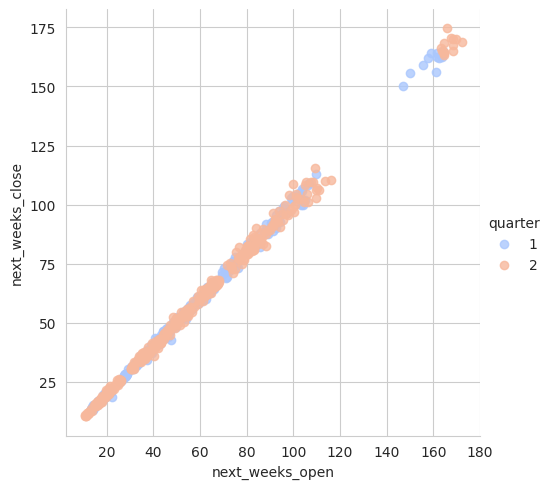

In [83]:
sns.set_style('whitegrid')
sns.lmplot(data=data1,x='next_weeks_open',y='next_weeks_close', hue='quarter',palette='coolwarm',fit_reg=False)

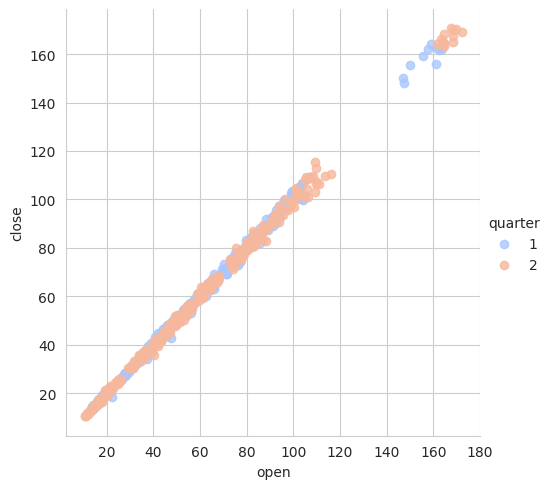

In [84]:
sns.set_style('whitegrid')
sns.lmplot(data=data1, x='open',y='close', hue='quarter',palette='coolwarm',fit_reg=False)

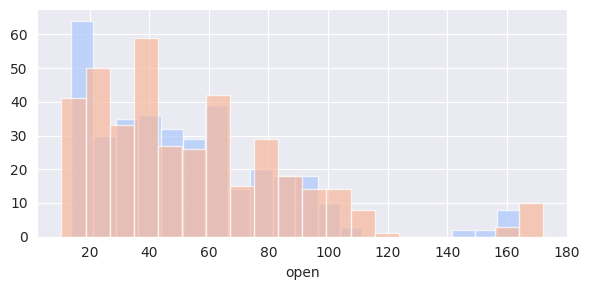

In [85]:
sns.set_style('darkgrid')
g = sns.FacetGrid(data1,hue="quarter",palette='coolwarm',aspect=2)
g = g.map(plt.hist,'open',bins=20,alpha=0.7)

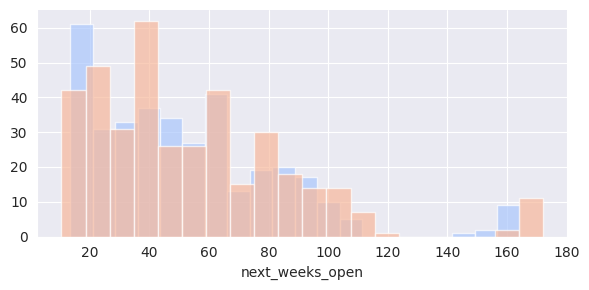

In [86]:
sns.set_style('darkgrid')
g = sns.FacetGrid(data1,hue="quarter",palette='coolwarm',aspect=2)
g = g.map(plt.hist,'next_weeks_open',bins=20,alpha=0.7)

In [87]:
data1[data1['open'] < 11]

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
410,2,BAC,17-06-11,10.89,11.12,10.40,10.68,889460755,-1.928370,1.857383,873241317.0,10.59,10.52,-0.661001,75,0.093633
411,2,BAC,24-06-11,10.59,10.94,10.48,10.52,603098073,-0.661001,-32.195089,889460755.0,10.52,11.09,5.418250,68,0.095057


In [88]:
data1['next_weeks_open']['quarter(2)'] = 100

<ipython-input-88-6aa4545e30dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['next_weeks_open']['quarter(2)'] = 100


In [89]:
data1[data1['next_weeks_open'] > 170]

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
520,2,IBM,29-04-11,167.65,173.0,167.23,170.58,26829625,1.74769,13.383995,23662621.0,172.11,168.89,-1.8709,7,0.439676


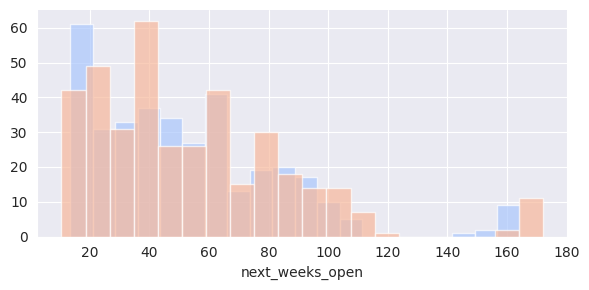

In [90]:
sns.set_style('darkgrid')
g = sns.FacetGrid(data1,hue="quarter",palette='coolwarm',aspect=2)
g = g.map(plt.hist,'next_weeks_open',bins=20,alpha=0.7)

In [91]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)

In [92]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

# Assuming 'data1' is your DataFrame
# Drop non-numeric columns for simplicity (modify this based on your actual data)
data1_numeric = data1.select_dtypes(include='number')

# If there are non-numeric columns, perform one-hot encoding
non_numeric_columns = data1.columns.difference(data1_numeric.columns)
if len(non_numeric_columns) > 0:
    encoder = OneHotEncoder(sparse=False, drop='first')
    data1_encoded = pd.DataFrame(encoder.fit_transform(data1[non_numeric_columns]), columns=encoder.get_feature_names_out())
    data1_numeric = pd.concat([data1_numeric, data1_encoded], axis=1)

# Drop rows with missing values
data1_numeric_no_missing = data1_numeric.dropna()

# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit KMeans
kmeans.fit(data1_numeric_no_missing)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


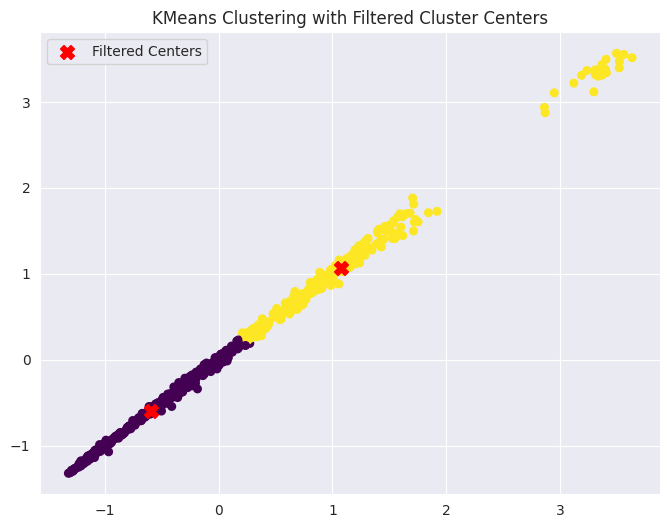

In [124]:
import networkx as nx
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'data1_imputed' is your DataFrame
# Assuming you have selected relevant features for clustering
features = ['open', 'close']  # Modify this based on your data

# Normalize the features
scaler = StandardScaler()
data1_imputed_normalized = scaler.fit_transform(data1_imputed[features])

# Apply KMeans clustering
num_clusters = 2  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans_labels = kmeans.fit_predict(data1_imputed_normalized)

# Filter clusters based on the number of points
min_points_in_cluster = 10  # You can adjust this threshold
cluster_centers = kmeans.cluster_centers_
filtered_centers = []
for i in range(num_clusters):
    cluster_points = data1_imputed_normalized[kmeans_labels == i]
    if len(cluster_points) >= min_points_in_cluster:
        filtered_centers.append(cluster_centers[i])

filtered_centers = np.array(filtered_centers)

# Scatter plot for filtered cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(data1_imputed_normalized[:, 0], data1_imputed_normalized[:, 1], c=kmeans_labels, cmap='viridis', s=30)
plt.scatter(filtered_centers[:, 0], filtered_centers[:, 1], c='red', marker='X', s=100, label='Filtered Centers')
plt.title('KMeans Clustering with Filtered Cluster Centers')
plt.legend()
plt.show()


In [125]:
def converter(stock):
    # Convert any non-zero, non-null values to 1
    return 1 if stock else 0


In [95]:
data1['Cluster'] = data1['stock'].apply(converter)
data1.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,Cluster
0,1,AA,07-01-11,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704,1
1,1,AA,14-01-11,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852,1
2,1,AA,21-01-11,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994,1
3,1,AA,28-01-11,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989,1
4,1,AA,04-02-11,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029,1


In [127]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# Assuming 'data1' is your DataFrame
# Drop non-numeric columns for simplicity (modify this based on your actual data)
data1_numeric = data1.select_dtypes(include='number')

# If there are non-numeric columns, perform imputation and one-hot encoding
non_numeric_columns = data1.columns.difference(data1_numeric.columns)
if len(non_numeric_columns) > 0:
    imputer = SimpleImputer(strategy='mean')
    data1_imputed = pd.DataFrame(imputer.fit_transform(data1_numeric), columns=data1_numeric.columns)

# Initialize KMeans
kmeans = KMeans(n_clusters=2, random_state=0)

# Fit KMeans
kmeans.fit(data1_imputed)

# Use kmeans.predict() to get labels for all data points
y_pred = kmeans.predict(data1_imputed)

# Create confusion matrix
conf_matrix = confusion_matrix(data1['quarter'], y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print a classification report
class_report = classification_report(data1['quarter'], y_pred)
print("\nClassification Report:")
print(class_report)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Confusion Matrix:
[[  0   0   0]
 [306  54   0]
 [338  52   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.51      0.15      0.23       360
           2       0.00      0.00      0.00       390

    accuracy                           0.07       750
   macro avg       0.17      0.05      0.08       750
weighted avg       0.24      0.07      0.11       750



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

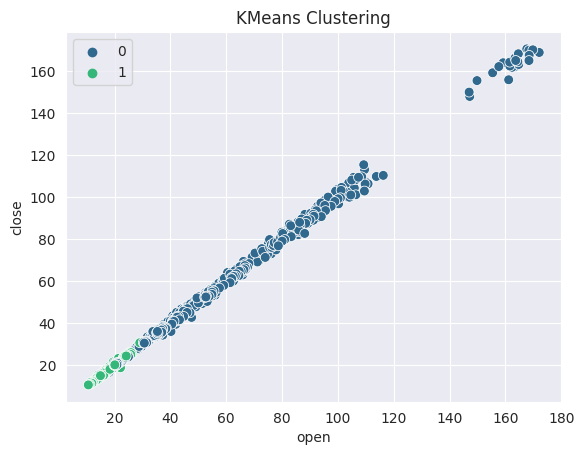

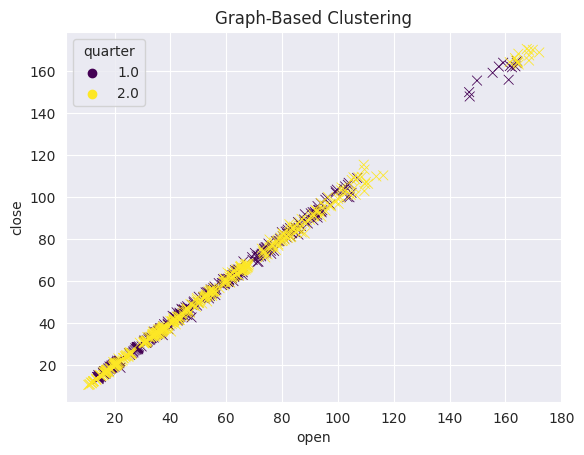

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'open' and 'close' columns are relevant features for visualization
features = ['open', 'close']

# Scatter plot for KMeans
sns.scatterplot(data=data1_imputed, x=features[0], y=features[1], hue=kmeans.labels_, palette='viridis', marker='o', s=50)
plt.title('KMeans Clustering')
plt.show()

# Scatter plot for graph-based clustering
# Assuming 'quarter' is the column you want to use for coloring in graph-based clustering
quarter = data1_imputed['quarter']

# Scatter plot for graph-based clustering
sns.scatterplot(data=data1_imputed, x=features[0], y=features[1], hue=quarter, palette='viridis', marker='x', s=50)
plt.title('Graph-Based Clustering')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


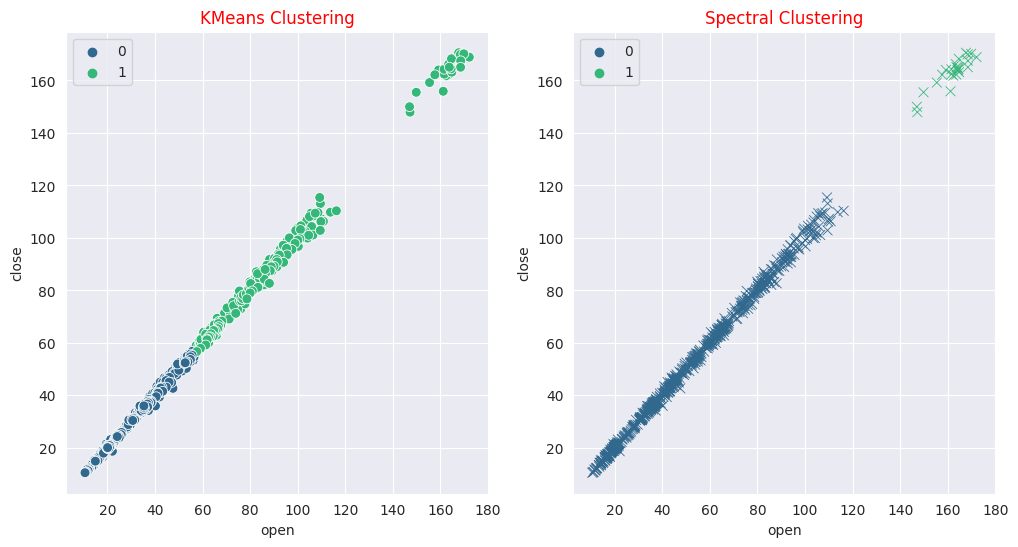

Silhouette Score - KMeans: 0.25605253017175217
Silhouette Score - Spectral Clustering: 0.48677245749174686


In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering

# Assuming 'data1' is your DataFrame
# Drop non-numeric columns for simplicity (modify this based on your actual data)
data1_numeric = data1.select_dtypes(include='number')

# If there are non-numeric columns, perform imputation and scaling
non_numeric_columns = data1.columns.difference(data1_numeric.columns)
if len(non_numeric_columns) > 0:
    imputer = SimpleImputer(strategy='mean')
    scaler = StandardScaler()
    data1_imputed_scaled = scaler.fit_transform(imputer.fit_transform(data1_numeric))

# Initialize KMeans
kmeans = KMeans(n_clusters=2, random_state=0)

# Fit KMeans
kmeans_labels = kmeans.fit_predict(data1_imputed_scaled)

# Assuming 'open' and 'close' columns are relevant features for visualization
features = ['open', 'close']

# Scatter plot for KMeans
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=data1_imputed, x=features[0], y=features[1], hue=kmeans_labels, palette='viridis', marker='o', s=50)
plt.title('KMeans Clustering', color = "red")

# Initialize SpectralClustering
n_clusters = 2
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=0)

# Fit SpectralClustering
spectral_labels = spectral.fit_predict(data1_imputed_scaled)

# Scatter plot for SpectralClustering
plt.subplot(1, 2, 2)
sns.scatterplot(data=data1_imputed, x=features[0], y=features[1], hue=spectral_labels, palette='viridis', marker='x', s=50)
plt.title('Spectral Clustering',color = "red")

plt.show()

# Compare silhouette scores
silhouette_kmeans = silhouette_score(data1_imputed_scaled, kmeans_labels)
silhouette_spectral = silhouette_score(data1_imputed_scaled, spectral_labels)

print(f"Silhouette Score - KMeans: {silhouette_kmeans}")
print(f"Silhouette Score - Spectral Clustering: {silhouette_spectral}")


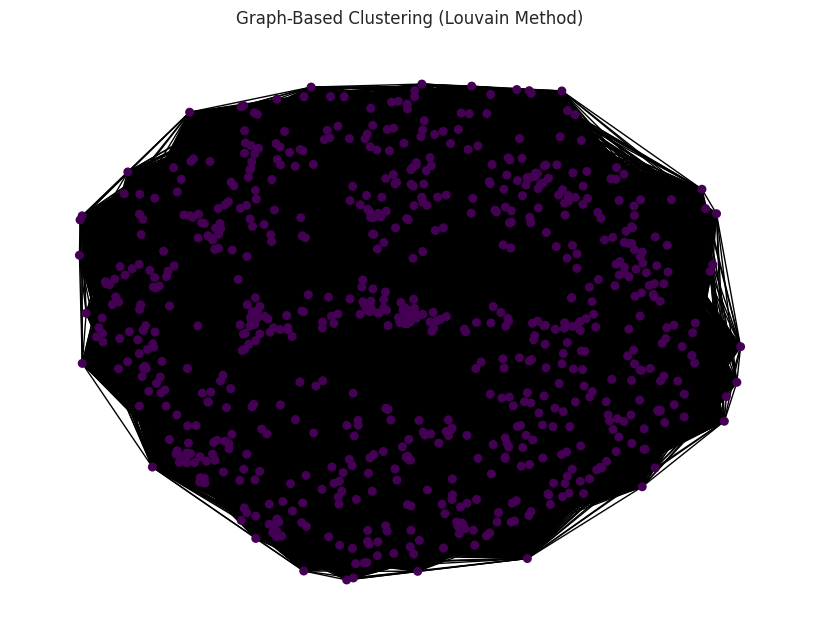

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [122]:
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler
from networkx.algorithms import community
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Assuming 'data1_imputed' is your DataFrame
# Assuming you have selected relevant features for clustering
features = ['open', 'close']  # Modify this based on your data

# Normalize the features
scaler = StandardScaler()
data1_imputed_normalized = scaler.fit_transform(data1_imputed[features])

# Calculate Euclidean distance matrix
euclidean_distance_matrix = euclidean_distances(data1_imputed_normalized)

# Create a graph
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(range(len(data1_imputed)))

# Add edges based on distance (similarity)
for i in range(len(data1_imputed)):
    for j in range(i + 1, len(data1_imputed)):
        weight = euclidean_distance_matrix[i, j]
        G.add_edge(i, j, weight=weight)

# Apply the Louvain method for community detection
partition = community.greedy_modularity_communities(G)

# Convert the partition to a list of labels
graph_labels = [0] * len(data1_imputed)
for i, community_set in enumerate(partition):
    for node in community_set:
        graph_labels[node] = i

# Scatter plot for Louvain-based clustering
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, node_color=graph_labels, cmap='viridis', with_labels=False, node_size=30)
plt.title('Graph-Based Clustering (Louvain Method)')
plt.show()

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(data1_imputed_normalized, graph_labels, metric='euclidean')
print(f"Silhouette Score: {silhouette_avg}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


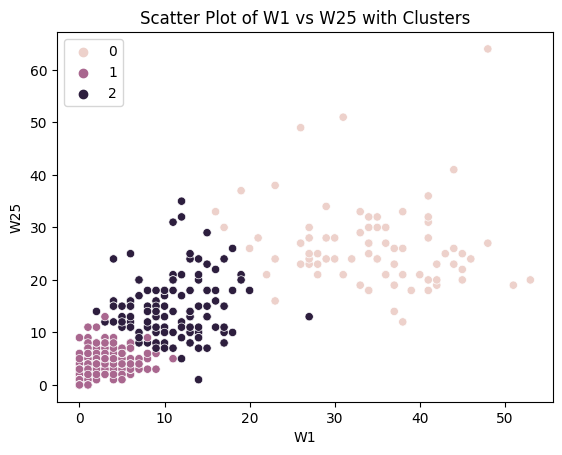

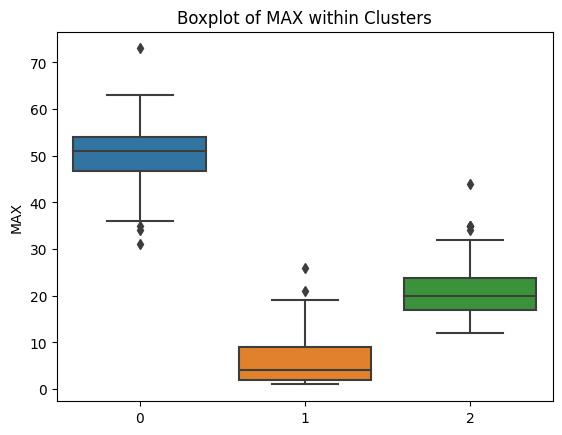

Silhouette Score: 0.6001525420776875
